In [12]:
# Imports
from sklearn.cluster import KMeans # K means model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [13]:
# set up folder link and files
folder_link = 'C:/Users/Michael/projects/kaggle/rossman/'

train_file = folder_link + 'train.csv'
test_file = folder_link + 'test.csv'
submission_file = folder_link + 'predictions_Clustering.csv'
store_file = folder_link + 'store.csv'

In [14]:
# set up dataframes
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
store = pd.read_csv(store_file)

In [15]:
# merge train and store data
train1 = train

# change state holiday to numeric
train1.StateHoliday = train1.StateHoliday.map({0:0,'0':1,'a':2,'b':3,'c':4})
train1.StateHoliday = train1.StateHoliday.astype(int)

In [16]:
# inspect data
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,1,1
1,2,5,2015-07-31,6064,625,1,1,1,1
2,3,5,2015-07-31,8314,821,1,1,1,1
3,4,5,2015-07-31,13995,1498,1,1,1,1
4,5,5,2015-07-31,4822,559,1,1,1,1


In [17]:
# drop labels from dataframe
train1.drop('Store',axis=1,inplace=True)
train1.drop('Date',axis=1,inplace=True)
train1.dtypes

DayOfWeek        int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int32
SchoolHoliday    int64
dtype: object

In [18]:
# standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train1)

C:\Users\Michael\Anaconda\lib\site-packages\sklearn\utils\validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [19]:
# set random seed for reproducibility
np.random.seed(0)

In [20]:
# Run KMeans
est = KMeans(n_clusters=2,init='random') #instatiate estimator
est.fit(data_scaled) # fit your data
y_kmeans = est.predict(data_scaled) #make cluser predictiosn

In [22]:
# inspect the data by looking at the means for each cluster
train1.groupby(y_kmeans).mean()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,3.519553,6956.949935,762.881195,1.000000,0.446462,0.868572,0.193625
1,6.334333,1.357024,0.171397,0.001202,0.064638,1.149210,0.105569


In [23]:
# compare against mean data
train1.mean()

DayOfWeek           3.998341
Sales            5773.818972
Customers         633.145946
Open                0.830107
Promo               0.381515
StateHoliday        0.916308
SchoolHoliday       0.178647
dtype: float64

In [25]:
# we can get the coordinates for the center of each cluster
centers = est.cluster_centers_
centers

array([[-0.23971239,  0.30731802,  0.27935871,  0.45239852,  0.13370635,
        -0.10559911,  0.03910358],
       [ 1.16952544, -1.49936445, -1.36295462, -2.20719326, -0.65233581,
         0.51520425, -0.19078126]])

In [27]:
# clusters are simply open & closed
# removing closed stores from dataset
train2 = train1[train1['Open'] == 1]
train2.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,5,5263,555,1,1,1,1
1,5,6064,625,1,1,1,1
2,5,8314,821,1,1,1,1
3,5,13995,1498,1,1,1,1
4,5,4822,559,1,1,1,1


In [28]:
# standardize data
scaler2 = StandardScaler()
data_scaled2 = scaler2.fit_transform(train2)

# set random seed for reproducibility
np.random.seed(1)

# run KMeans
est2 = KMeans(n_clusters=2,init='random') #instatiate estimator
est2.fit(data_scaled2)
y_kmeans2 = est2.predict(data_scaled2)

# inspect the clusters
train2.groupby(y_kmeans2).mean()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2.951027,8621.465868,917.386577,1,0.923820,0.873112,0.216871
1,4.033303,5454.577037,623.389275,1,0.016178,0.864557,0.172595


In [29]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

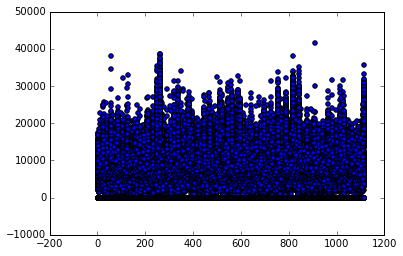

In [36]:
# plotting sales against store
train_test = pd.read_csv(train_file)
plt.scatter(train_test.Store,train_test.Sales)

In [40]:
# groupby store
train_test.groupby(train_test.Store).Sales.mean().describe()

count     1115.000000
mean      5763.320541
std       2046.447377
min       2244.503185
25%       4412.415567
50%       5459.185775
75%       6633.871550
max      20718.515924
Name: Sales, dtype: float64

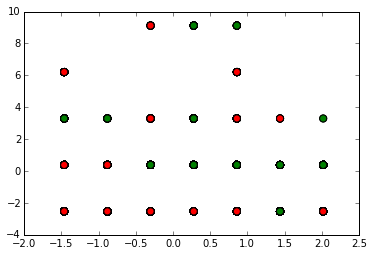

In [41]:
# visualize the clusers from train2
colors = np.array(['red','green','blue','yellow','orange'])
plt.figure()
plt.scatter(data_scaled2[:,0],data_scaled2[:,5],c=colors[y_kmeans2],s=50)
plt.show()

In [47]:
# determine number of clusters
k_rng = range(2,4)
k_est = [KMeans(n_clusters=k).fit(train2) for k in k_rng]

In [49]:
# silhouette coefficient
silhouette_score = [metrics.silhouette_score(train2, e.labels_, metric='euclidean') for e in k_est]

MemoryError: 